In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [244]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
171,172,Male,28,87,75
53,54,Male,59,43,60
156,157,Male,37,78,1
120,121,Male,27,67,56
27,28,Male,35,28,61


In [245]:
df.drop(columns=['CustomerID','Gender'],inplace=True,axis=1)

In [246]:
df.shape

(200, 3)

In [247]:
df.isna().sum()

,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [248]:
df.duplicated().sum()

np.int64(0)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [250]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


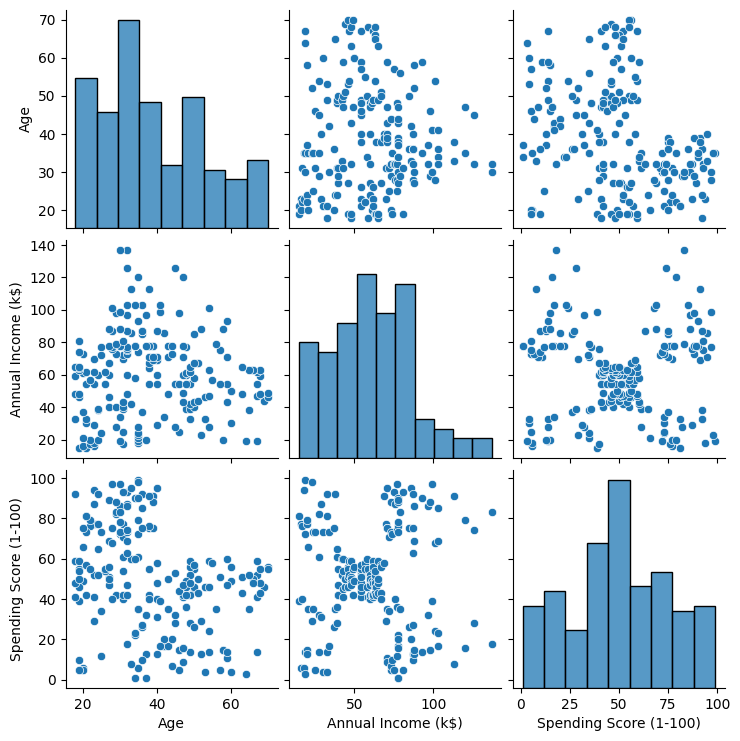

In [251]:
sns.pairplot(df)

# training model

In [252]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit_predict(df)
    wcss.append(km.inertia_)

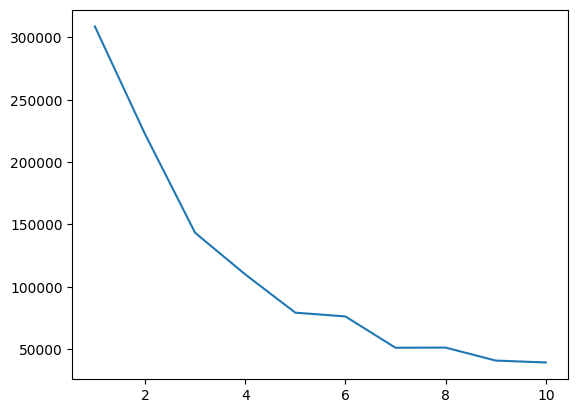

In [253]:
plt.plot(range(1,11), wcss)

chosing 6 as a elbow point

In [254]:
model = KMeans(n_clusters=6,init='k-means++')
y = model.fit_predict(df)

In [255]:
y

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

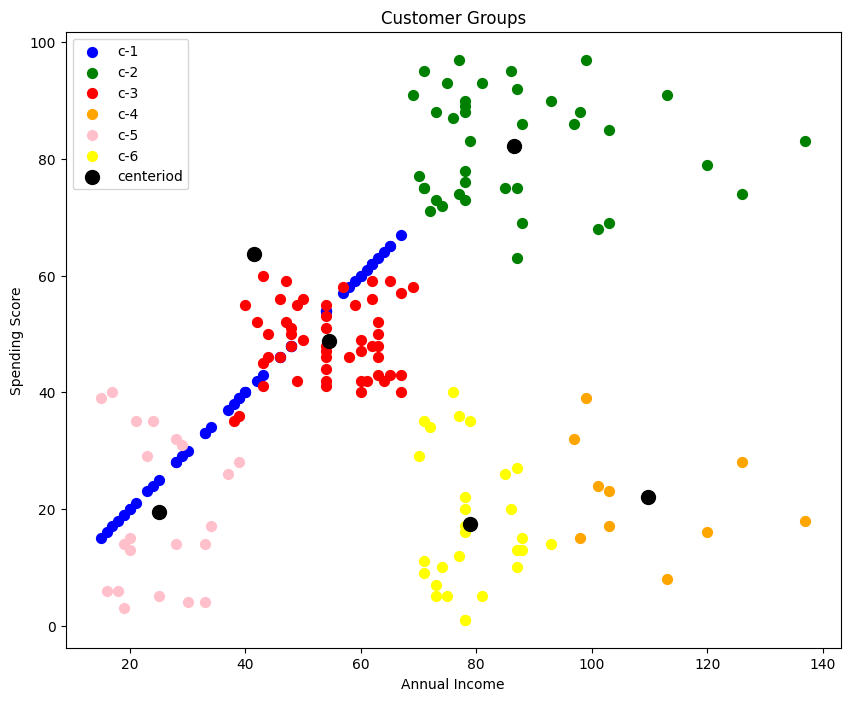

In [256]:
X = df.iloc[:,[1,2]].values
plt.figure(figsize=(10,8))
plt.scatter(X[y==0,0],X[y==0,0],s=50,c='blue',label='c-1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='green',label='c-2')
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='red',label='c-3')
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='orange',label='c-4')
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='pink',label='c-5')
plt.scatter(X[y==5,0],X[y==5,1],s=50,c='yellow',label='c-6')

# plotting centorids
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,2],
            s=100,c='black',label='centeriod')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()